# 3. Graphs and Sessions

Development in TensorFlow is a two step process:
1. First, Build a computation graph.
2. Then, create a session to execute operations in the graph.

What is a computation graph? What is a session? 

TL;DR (quoted from [some guy's blog](https://danijar.com/what-is-a-tensorflow-session/))
- A **graph** defines the computation. It doesn’t compute anything, it doesn’t hold any values, it just defines the operations that you specified in your code.
- A **session** allows to execute graphs or part of graphs. It allocates resources (on one or more machines) for that and holds the actual values of intermediate results and variables.

Let's take a look at them one at a time.

## Computations Graphs

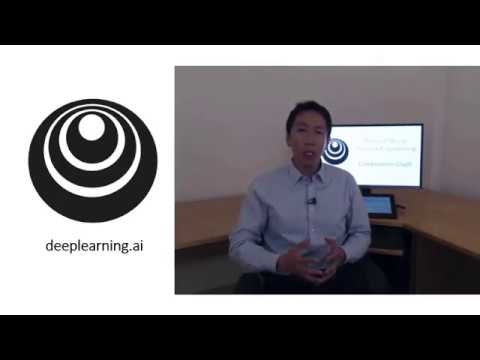

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('hCP1vGoCdYU')

Ok, let's try to do compute $3(a+bc)$ ourselves. For now, let's assume they are integer constants. The computation graph is built in TensorFlow as follows:

In [2]:
import tensorflow as tf

a = tf.constant(3) # define an integer constant as a TensorFlow tensor
b = tf.constant(4)
c = tf.constant(5)
J = 3 * (a + b * c) # add and multiply just like in Python (see section 4 for more)

Ok, cool! What's inside the variable `J`? Let's print it out:

In [3]:
J

<tf.Tensor 'mul_1:0' shape=() dtype=int32>

Why is the output not 69!? To understand this, we need to understand what computation graphs are. As noted above, a computation graph is a chain of numerical operations. As in the case of the above operation, it will look like this:

In [4]:
from utils import tf_to_dot

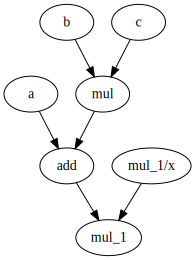

In [5]:
## Warning: Some people reported that this code doesn't run. 
##          If that's the case, please ignore this cell for now, as this is not an essential part of the workshop. 

g = tf.Graph()

with g.as_default():
    a = tf.constant(3, name='a')
    b = tf.constant(4, name='b')
    c = tf.constant(5, name='c')
    J = 3 * (a + b * c)
    
tf_to_dot(g)

## Sessions

Now that we defined a computation graph, the next thing to do is to actually evaluate it. To do so, we use a session. A session creates an environment where operations in the graph are executed and values are evaluated.

In [6]:
tf.reset_default_graph() # Clearing all tensors before this

a = tf.constant(3)
b = tf.constant(4)
c = tf.constant(5)
J = 3 * (a + b * c)

with tf.Session() as sess:
    print(sess.run(J))

69


## Exercise

1) Write your favorite operation in TensorFlow.

2) Print the computation graph corresponding to that operation.

3) Evaluate the result using session.

In [9]:
g = tf.Graph()

def fib1(n):
    if n == 0: return tf.constant(0,name='0')
    elif n == 1: return tf.constant(1,name='1')
    else: return tf.add(fib1(n-1),fib1(n-2),name=str(n))
    
with g.as_default():
    res = fib1(10)
    with tf.Session() as sess:
        print(sess.run(res))

55


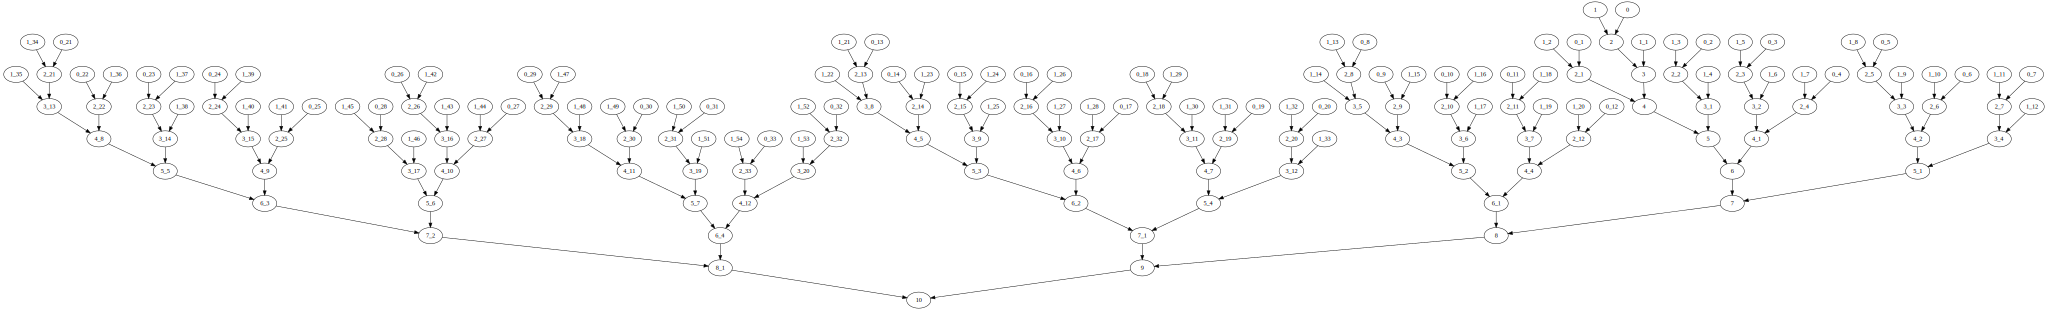

In [10]:
tf_to_dot(g)

In [11]:
g = tf.Graph()

def fib2(n):
    a,b = tf.constant(1),tf.constant(1)
    for i in range(n-1):
        a,b = b,a+b
    return a

with g.as_default():
    res = fib2(10)
    with tf.Session() as sess:
        print(sess.run(res))

55


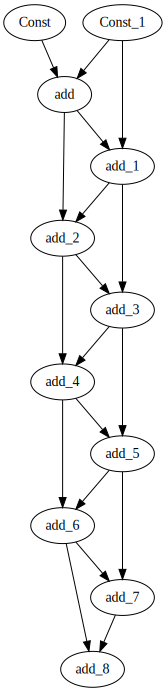

In [33]:
tf_to_dot(g)

## Eager Mode

Not that this two step development process may change if eager mode is fully introduced in TensorFlow. Eager mode is a different machine learning programming paradigm, primarily adopted by PyTorch, as I've mentioned in the previous section. I won't go into details here. You can read more about it [here](https://research.googleblog.com/2017/10/eager-execution-imperative-define-by.html).